# EDA 

In [33]:
import pandas as pd
import numpy as np

In [34]:
import os

data_base_path = 'data'
listdir = os.listdir(data_base_path)
listdir.remove('.DS_Store')

data_paths = []

for dir_name in listdir:
    file_dir_name = os.path.join(data_base_path, dir_name)
    for filename in os.listdir(file_dir_name):
        if filename == '.DS_Store':
            continue
        data_paths.append(os.path.join(file_dir_name, filename))
data_paths

['data/4th/validation_data.csv',
 'data/4th/comments_to_score.csv',
 'data/4th/sample_submission.csv',
 'data/ruddit/ruddit_with_text_1.csv',
 'data/1st/test_labels.csv',
 'data/1st/test.csv',
 'data/1st/train.csv',
 'data/2nd/test_public_expanded.csv',
 'data/2nd/identity_individual_annotations.csv',
 'data/2nd/test_private_expanded.csv',
 'data/2nd/test.csv',
 'data/2nd/all_data.csv',
 'data/2nd/toxicity_individual_annotations.csv',
 'data/2nd/train.csv',
 'data/2nd/sample_submission.csv']

In [1]:
# library for data analysis
import numpy as np
import pandas as pd

# visualizing library
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## 1st competition data

In [19]:
# read data
train_1st = pd.read_csv('data/1st/train.csv')
# sample
train_1st.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### meaning of columns
* id : comment id
* comment_text : text of comment
* rest of columns : one hot encodings about label 
    - toxic
    - severe_toxic
    - obscene
    - threat
    - insult
    - identity_hate

In [36]:
len(train_1st)

159571

In [37]:
# 결측값 확인
train_1st['comment_text'].isna().sum()

0

In [54]:
train_1st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [55]:
train_1st.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
# 2개 이상의 label에 동시에 체크된 경우
cnt_multi = 0
for i in range(len(train_1st)):
    if train_1st.iloc[i, 2:].sum() > 1:
        cnt_multi += 1
cnt_multi

9865

In [16]:
train_1st['labels'] = train_1st['toxic']
train_1st['labels'].replace(1, 'toxic ', inplace=True)
train_1st['labels'].replace(0, '', inplace=True)
train_1st['labels'].value_counts()

          144277
toxic      15294
Name: labels, dtype: int64

In [20]:
train_1st['labels'] = ''
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for i, label in enumerate(labels):
    train_1st[f'label{i}'] = train_1st[label].apply(str)
    train_1st[f'label{i}'].replace('1', f'{label} ', inplace=True)
    train_1st[f'label{i}'].replace('0', '', inplace=True)
    train_1st['labels'] += train_1st[f'label{i}']
train_1st['labels'].value_counts()

                                                           143346
toxic                                                        5666
toxic obscene insult                                         3800
toxic obscene                                                1758
toxic insult                                                 1215
toxic severe_toxic obscene insult                             989
toxic obscene insult identity_hate                            618
obscene                                                       317
insult                                                        301
toxic severe_toxic obscene insult identity_hate               265
obscene insult                                                181
toxic severe_toxic obscene                                    158
toxic identity_hate                                           136
toxic insult identity_hate                                    134
toxic obscene threat insult                                   131
toxic thre

In [21]:
train_1st[train_1st['labels']==''] = 'normal'

In [22]:
train_1st['labels'].value_counts()

normal                                                     143346
toxic                                                        5666
toxic obscene insult                                         3800
toxic obscene                                                1758
toxic insult                                                 1215
toxic severe_toxic obscene insult                             989
toxic obscene insult identity_hate                            618
obscene                                                       317
insult                                                        301
toxic severe_toxic obscene insult identity_hate               265
obscene insult                                                181
toxic severe_toxic obscene                                    158
toxic identity_hate                                           136
toxic insult identity_hate                                    134
toxic obscene threat insult                                   131
toxic thre

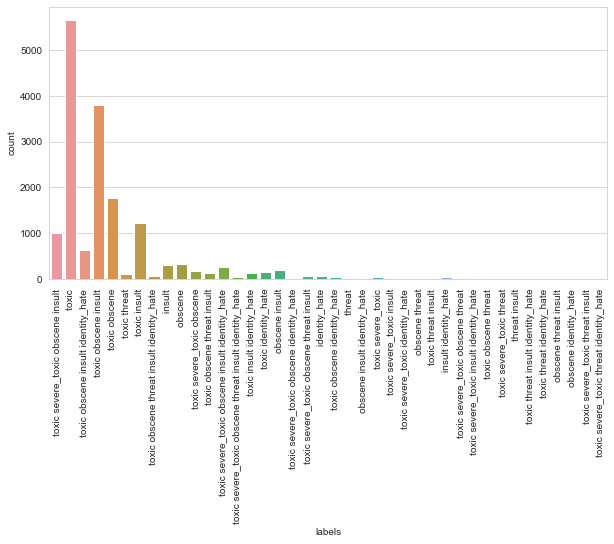

In [28]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.countplot(x='labels', data=train_1st[train_1st['labels']!='normal'])
plt.xticks(rotation=90)
plt.show()

## Ruddit data

In [29]:
ruddit_path = 'data/ruddit/ruddit_with_text_1.csv'

In [30]:
ruddit_data = pd.read_csv(ruddit_path)
ruddit_data.head()

,post_id,comment_id,txt,url,offensiveness_score
0,42g75o,cza1q49,> The difference in average earnings between m...,https://www.reddit.com/r/changemyview/comments...,-0.083
1,42g75o,cza1wdh,"The myth is that the ""gap"" is entirely based o...",https://www.reddit.com/r/changemyview/comments...,-0.022
2,42g75o,cza23qx,[deleted],https://www.reddit.com/r/changemyview/comments...,0.167
3,42g75o,cza2bw8,The assertion is that women get paid less for ...,https://www.reddit.com/r/changemyview/comments...,-0.146
4,42g75o,cza2iji,You said in the OP that's not what they're mea...,https://www.reddit.com/r/changemyview/comments...,-0.083


### Meaning of columns

* post_id: post id
* comment_id: comment id
* txt: comment text
* url: comment's url
* offensiveness_score : comment's offensiveness score

In [32]:
# txt에서 [deleted] 있으면 행 지우기 (결측값)
ruddit = ruddit_data[ruddit_data['txt'] != '[deleted]']
len(ruddit)

453

In [33]:
ruddit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 470
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_id              453 non-null    object 
 1   comment_id           453 non-null    object 
 2   txt                  453 non-null    object 
 3   url                  453 non-null    object 
 4   offensiveness_score  453 non-null    float64
dtypes: float64(1), object(4)
memory usage: 21.2+ KB


In [34]:
ruddit.describe()

,offensiveness_score
count,453.000000
mean,-0.026638
std,0.235090
min,-0.681000
25%,-0.167000
50%,-0.021000
75%,0.125000
max,0.688000


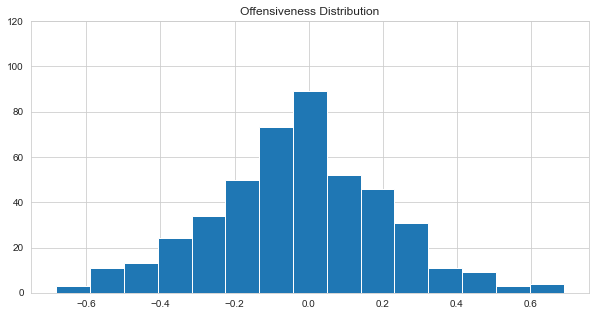

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.hist(ruddit['offensiveness_score'], bins=15)
ax.set_ylim(0, 120)
ax.set_title('Offensiveness Distribution')
plt.show()